##  Library Instalation

In [ ]:
!pip install git+https://github.com/oracle/Skater.git

In [54]:
%pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Imports

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from tabulate import tabulate
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.linear_model import Perceptron
from timeit import timeit
from sklearn import datasets, tree
import datetime
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import pylab 
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
#from graphviz import Source
from IPython.display import Image
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
from scipy import interp
from sklearn.base import BaseEstimator, TransformerMixin, clone, ClassifierMixin
from sklearn import metrics, tree
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.tree import DecisionTreeClassifier
#import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
#from mlxtend.classifier import StackingClassifier
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
import scipy
from sklearn.model_selection import GridSearchCV
from google.cloud import bigquery
from sklearn.model_selection import TimeSeriesSplit


## Extracting the Data

In [4]:
# set display options to show all columns
pd.set_option('display.max_columns', None)
# Set the float format to display numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Set the client for future queries to BigQuery
client = bigquery.Client(project = "continente-lced-feup")

In [5]:
!gcloud auth application-default login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=lkyDnoXnQ6PmHUGE2UAsLpn8r8VTLl&access_type=offline&code_challenge=BoM0TrpZUXl3FEoTg9mEiVX-XhVbjiKtHFdwR52NgGE&code_challenge_method=S256


Credentials saved to file: [/Users/henriqueribeiro/.config/gcloud/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "continente-lced-feup" was added to ADC which can be used by Google client libraries for billing and quota. Note that some services may still bill the project

## Data Loading

In [6]:
query = client.query("""
   SELECT *
   FROM 
       tables_staging.df_models
   
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,CUSTOMER_ACCOUNT_NR_MASK,SUBCAT_CD_EXT,MONTH,YEAR,QUARTER,SEMESTER,CUST_NUM_TRANSACTIONS_MONTH,CUST_NUM_TRANSACTIONS_QUARTER,CUST_NUM_TRANSACTIONS_SEMESTER,CUST_NUM_TRANSACTIONS_YEAR,CUST_NUM_UNIQUE_SUBCAT_MONTH,CUST_NUM_UNIQUE_SUBCAT_QUARTER,CUST_NUM_UNIQUE_SUBCAT_SEMESTER,CUST_NUM_UNIQUE_SUBCAT_YEAR,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,CUST_AVG_BASKET_SIZE_MONTH,CUST_AVG_BASKET_SIZE_QUARTER,CUST_AVG_BASKET_SIZE_SEMESTER,CUST_AVG_BASKET_SIZE_YEAR,SUBCAT_NUM_TRANSACTIONS_MONTH,SUBCAT_NUM_TRANSACTIONS_QUARTER,SUBCAT_NUM_TRANSACTIONS_SEMESTER,SUBCAT_NUM_TRANSACTIONS_YEAR,SUBCAT_NUM_UNIQUE_CUST_MONTH,SUBCAT_NUM_UNIQUE_CUST_QUARTER,SUBCAT_NUM_UNIQUE_CUST_SEMESTER,SUBCAT_NUM_UNIQUE_CUST_YEAR,CUSTSUBCAT_NUM_TRANSACTIONS_MONTH,CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER,CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER,CUSTSUBCAT_NUM_TRANSACTIONS_YEAR,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,GENDER,FAMILY_MEMBERS,SEG_LIFESTYLE_CD,SEG_LIFESTAGE_CD,CAT_CD_EXT,TARGET
0,131446222,30208,9,2021,3,2,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,135,378,826,1365,86,179,301,366,0,0,0,0,0.00,0.00,0.00,0.00,F,<NA>,4,6,302,0
1,86086451,30208,12,2022,4,2,0,2,6,36,0,6,29,56,0.00,5.00,30.00,9.40,0.00,5.00,7.50,7.67,324,905,1857,3110,204,393,567,712,0,0,0,0,0.00,0.00,0.00,0.00,F,<NA>,2,4,302,<NA>
2,102947187,30208,9,2021,3,2,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,135,378,826,1365,86,179,301,366,0,0,0,0,0.00,0.00,0.00,0.00,F,4,3,5,302,0
3,1742320,30208,10,2022,4,2,0,1,1,1,0,3,3,3,0.00,0.00,0.00,0.00,0.00,4.00,4.00,4.00,321,949,1944,3542,216,491,773,1090,0,0,0,0,0.00,0.00,0.00,0.00,M,4,3,6,302,0
4,124664571,30208,11,2021,4,2,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117,448,826,1365,72,205,301,366,0,0,0,0,0.00,0.00,0.00,0.00,M,2,1,5,302,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31139563,83457602,30207,7,2021,3,2,3,7,11,18,4,7,14,17,12.50,11.67,12.40,16.94,1.33,1.29,1.82,2.17,124,397,742,1452,106,262,395,592,0,0,0,0,0.00,0.00,0.00,0.00,M,1,3,5,302,0
31139564,102771240,30207,3,2022,1,1,2,5,12,40,5,23,30,58,1.00,19.25,16.18,9.28,2.50,6.80,4.67,4.40,109,311,673,1503,87,201,359,631,0,1,2,4,0.00,0.00,136.00,110.33,F,3,3,5,302,0
31139565,130254352,30207,1,2022,1,1,0,0,0,6,0,0,0,11,0.00,0.00,0.00,11.00,0.00,0.00,0.00,2.17,105,311,673,1503,87,201,359,631,0,0,0,0,0.00,0.00,0.00,0.00,None,<NA>,2,5,302,0
31139566,130823023,30207,6,2021,2,1,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,136,368,710,1452,112,222,341,592,0,0,0,0,0.00,0.00,0.00,0.00,None,<NA>,3,2,302,0


In [2]:
df.isnull().sum()

NameError: name 'df' is not defined

In [7]:
#wines = wines_binary_norm.sample(frac=1, random_state=101).reset_index(drop=True)
y_tp = df['TARGET']
#df = df.dropna()
cols = df.columns 

In [ ]:

#drop df columns gender and family members
#df = df.drop('FAMILY_MEMBERS', axis=0)
#cols = list(cols.drop(['GENDER','FAMILY_MEMBERS']))


#X_train, X_test, y_train, y_test = train_test_split(df.loc[:, cols[:-2]], y_tp, test_size=0.20, random_state=101)

In [ ]:
df

In [ ]:
#X_test

### Splitting the Data with CV

In [8]:
df['fulldate'] = pd.to_datetime(df['MONTH'].astype(str) + '-' + df['YEAR'].astype(str))


In [ ]:
df

In [ ]:
#df['fulldate'] type
df['fulldate'].dtype


In [9]:
# change from dtype datetime64[ns] to date time month
df['fulldate'] = df['fulldate'].dt.to_period('M')


In [ ]:
df['fulldate'].dt.month.head(5)

In [ ]:
df['fulldate'].dt.year.tail(5)

In [8]:
df.value_counts('fulldate').sort_index()

fulldate
2021-01    410874
2021-02    410874
2021-03    410874
2021-04    410874
2021-05    410874
2021-06    410874
2021-07    410874
2021-08    410874
2021-09    410874
2021-10    410874
2021-11    410874
2021-12    410874
2022-01    410874
2022-02    410874
2022-03    410874
2022-04    410874
2022-05    410874
2022-06    410874
2022-07    410874
2022-08    410874
2022-09    410874
2022-10    410874
2022-11    410874
2022-12    410874
Freq: M, dtype: int64

In [10]:
#drop gender column
df = df.drop(['GENDER'], axis=1)

In [ ]:
ts + 1 > timestamps.max()

## Cross Validation - DIY Version Ian

In [ ]:
#### CrossValidation do Ian

timestamps = df['fulldate'].sort_values().unique()
display(timestamps.size)

# find the minimum timestamp
min_timestamp = timestamps[0]

# iterate over the timestamps and check if the time difference is less than 12 months
for ts in timestamps:
    if ts + 1 > timestamps.max():
        break
    else:
        if (ts - min_timestamp).n < 11:
            print('train')
            print(ts)
            train = df[df['fulldate'] <= ts]
            print(train.shape)
        else:
            print('train')
            print(ts)
            train = df[(df['fulldate'] < ts) & ((df['fulldate'] > ts-12))]
            print(train.shape)
        test = df[df['fulldate'] == ts+1]
        print('test')
        print(ts+1)
        print(test.shape)
        ### The Get_results go here.


In [ ]:

X = df.loc[:, cols[:-1]].values

y= df['TARGET']

# Generate training/testing indices using sliding window where window size is 12 months, starting from the Feb. 2021 and ending in Nov. 2022


train_start_date = pd.to_datetime('2021-02-01')
train_end_date = pd.to_datetime('2021-12-01')

# Create a boolean mask to indicate the training rows
#train_mask = (df['fulldate'] >= train_start_date) & (df['fulldate'] <= train_end_date)

# Define the size of the sliding window
window_size = 3  # e.g. 3 months

# Iterate over the sliding windows
for i in range(len(df) - window_size):
    # Define the start and end dates for the training and testing windows
    print("\nSTART OF ITERATION\n")
    train_start = df.iloc[i]['fulldate']
    print(f"Train Start n.{i}: {train_start}")
    train_end = df.iloc[i + window_size - 1]['fulldate']
    print(f"\nTrain End n.{i}: {train_start}")
    test_start = df.iloc[i + window_size]['fulldate']
    print(f"\nTest Start n.{i}: {train_start}")
    test_end = df.iloc[i + window_size]['fulldate'] + pd.DateOffset(months=1)
    print(f"\nTest End n.{i}: {train_start}")
    print("\nEND OF ITERATION\n")
    
    # Create a boolean mask to indicate the training rows
    # train_mask = (df['fulldate'] >= train_start) & (df['fulldate'] <= train_end)
    
    # # Extract the features and target variables
    # X_train = df.loc[train_mask, cols[:-1]]
    # y_train = df.loc[train_mask, 'TARGET']
    
    # # Create a boolean mask to indicate the testing rows
    # test_mask = (df['fulldate'] >= test_start) & (df['fulldate'] <= test_end)
    
    # # Extract the features and target variables
    # X_test = df.loc[test_mask, cols[:-1]]
    # y_test = df.loc[test_mask, 'TARGET']

In [ ]:
df

In [ ]:
#count different unique index values
df.index.nunique()


In [ ]:
#df.set_index('fulldate', inplace=True)


In [11]:
n_splits = df.index.nunique()

In [14]:
#create dataframe with 10% of each index value
df_1mil = df.groupby('fulldate').sample(frac=0.03, random_state=101)

In [15]:
df_1mil #934k rows

,CUSTOMER_ACCOUNT_NR_MASK,SUBCAT_CD_EXT,MONTH,YEAR,QUARTER,SEMESTER,CUST_NUM_TRANSACTIONS_MONTH,CUST_NUM_TRANSACTIONS_QUARTER,CUST_NUM_TRANSACTIONS_SEMESTER,CUST_NUM_TRANSACTIONS_YEAR,CUST_NUM_UNIQUE_SUBCAT_MONTH,CUST_NUM_UNIQUE_SUBCAT_QUARTER,CUST_NUM_UNIQUE_SUBCAT_SEMESTER,CUST_NUM_UNIQUE_SUBCAT_YEAR,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,CUST_AVG_BASKET_SIZE_MONTH,CUST_AVG_BASKET_SIZE_QUARTER,CUST_AVG_BASKET_SIZE_SEMESTER,CUST_AVG_BASKET_SIZE_YEAR,SUBCAT_NUM_TRANSACTIONS_MONTH,SUBCAT_NUM_TRANSACTIONS_QUARTER,SUBCAT_NUM_TRANSACTIONS_SEMESTER,SUBCAT_NUM_TRANSACTIONS_YEAR,SUBCAT_NUM_UNIQUE_CUST_MONTH,SUBCAT_NUM_UNIQUE_CUST_QUARTER,SUBCAT_NUM_UNIQUE_CUST_SEMESTER,SUBCAT_NUM_UNIQUE_CUST_YEAR,CUSTSUBCAT_NUM_TRANSACTIONS_MONTH,CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER,CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER,CUSTSUBCAT_NUM_TRANSACTIONS_YEAR,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,FAMILY_MEMBERS,SEG_LIFESTYLE_CD,SEG_LIFESTAGE_CD,CAT_CD_EXT,TARGET,fulldate
12536233,39748303,50403,1,2021,1,1,5,11,25,62,29,40,49,75,4.00,7.40,7.08,5.70,15.00,13.82,10.52,9.84,160,453,900,1947,150,363,609,1021,0,0,0,0,0.00,0.00,0.00,0.00,2,1,4,504,0,2021-01
16606131,129968543,80403,1,2021,1,1,0,1,2,5,0,2,3,16,0.00,0.00,84.00,59.50,0.00,2.00,1.50,4.20,225,765,1635,3605,156,315,483,785,0,0,0,0,0.00,0.00,0.00,0.00,<NA>,2,3,804,0,2021-01
3288966,102750624,170301,1,2021,1,1,0,0,0,10,0,0,0,53,0.00,0.00,0.00,3.56,0.00,0.00,0.00,12.10,4,20,42,102,4,19,31,73,0,0,0,0,0.00,0.00,0.00,0.00,2,1,5,1703,0,2021-01
2892318,1728566,70204,1,2021,1,1,0,0,2,4,0,0,5,12,0.00,0.00,52.00,63.67,0.00,0.00,2.50,4.25,495,1505,2737,5735,381,812,1208,1922,0,0,0,0,0.00,0.00,0.00,0.00,3,2,4,702,0,2021-01
28548654,103282439,80104,1,2021,1,1,1,6,14,26,18,27,41,55,0.00,14.40,12.69,14.00,21.00,11.83,11.07,10.58,151,478,982,2177,103,208,317,518,1,3,5,9,0.00,28.00,35.75,33.62,0,2,4,801,1,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28106612,35180523,50403,12,2022,4,2,7,11,23,45,27,36,57,69,4.50,8.20,8.18,8.14,7.43,7.18,7.61,8.11,207,562,1107,2304,177,410,700,1207,0,0,0,1,0.00,0.00,0.00,0.00,1,1,5,504,<NA>,2022-12
20020780,93644400,170310,12,2022,4,2,5,10,19,37,15,23,48,72,6.50,7.67,8.11,10.06,3.60,3.80,6.16,8.62,133,229,329,460,117,165,220,290,0,0,0,0,0.00,0.00,0.00,0.00,<NA>,1,4,1703,<NA>,2022-12
19345824,1322160,170303,12,2022,4,2,2,2,4,7,2,2,5,7,13.00,13.00,55.00,32.00,1.00,1.00,1.75,2.71,240,413,591,959,203,320,420,593,0,0,0,0,0.00,0.00,0.00,0.00,2,3,5,1703,<NA>,2022-12
9377765,131620328,60304,12,2022,4,2,1,2,2,2,5,7,7,7,0.00,16.00,16.00,16.00,6.00,4.50,4.50,4.50,337,969,1949,3841,299,735,1237,1859,0,0,0,0,0.00,0.00,0.00,0.00,<NA>,3,6,603,<NA>,2022-12


In [38]:
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import time

start_time = time.time()

#df.set_index('fulldate', inplace=True)
# Create a TimeSeriesSplit object with n_splits = 5
tscv = TimeSeriesSplit(gap=0, max_train_size=12, n_splits=n_splits, test_size=1)


# Iterate through the splits and train/test indices
for train_index, test_index in tscv.split(df):
        train_data = df.iloc[train_index]
        test_data = df.iloc[test_index]
        print(test_data)
        # print("\nSTART OF ITERATION\n")
        # X_train = df.loc[train_index, cols[:-1]]
        # print(f"Iteration n.{train_index}: {X_train}")
        # y_train = df.loc[train_index, 'TARGET']
        # print(f"Iteration n.{train_index}: {y_train}")
        # X_test = df.loc[test_index, cols[:-1]]
        # print(f"Iteration n.{test_index}: {X_test}")
        # y_test = df.loc[test_index, 'TARGET']
        # print(f"Iteration n.{test_index}: {y_test}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")    
    # Your code for model training and evaluation goes here

ValueError: Cannot have number of folds=31139569 greater than the number of samples=31139568.

In [37]:
def get_results(model, gs ,name, data, true_labels, target_names = ['No buy', 'Buy'], results=None, reasume=False):

    if hasattr(model, 'layers'):
        param = wtp_dnn_model.history.params
        best = np.mean(history.history['val_accuracy'])
        predicted_labels = np.argmax(model.predict(data) , axis=-1)
        im_model = InMemoryModel(model.predict, examples=data, target_names=target_names)

    else:
        param = gs.best_params_
        best = gs.best_score_
        predicted_labels = model.predict(data).ravel()
        if hasattr(model, 'predict_proba'):
            im_model = InMemoryModel(model.predict_proba, examples=data, target_names=target_names)
        elif hasattr(clf, 'decision_function'):
            im_model = InMemoryModel(model.decision_function, examples=data, target_names=target_names)
        else: 
            print('Cannot use InMemoryModel as predict_proba is not available')
           
        
    print('Mean Best Accuracy: {:2.2%}'.format(best))
    print('-'*60)
    print('Best Parameters:')
    print(param)
    print('-'*60)
    
    y_pred = model.predict(data).ravel()
    
    display_model_performance_metrics(true_labels, predicted_labels = predicted_labels, target_names = target_names)
    if len(target_names)==2:
        ras = roc_auc_score(y_true=true_labels, y_score=y_pred)
    else:
        roc_auc_multiclass, ras = roc_auc_score_multiclass(y_true=true_labels, y_score=y_pred, target_names=target_names)
        print('\nROC AUC Score by Classes:\n',roc_auc_multiclass)
        print('-'*60)

    print('\n\n              ROC AUC Score: {:2.2%}'.format(ras))
    prob, score_roc, roc_auc = plot_model_roc_curve(model, data, true_labels, label_encoder=None, class_names=target_names)
    
    #interpreter = Interpretation(data, feature_names=cols)
    #plots = interpreter.feature_importance.plot_feature_importance(im_model, progressbar=False, n_jobs=1, ascending=True)
    
    r1 = pd.DataFrame([(prob, best, np.round(accuracy_score(true_labels, predicted_labels), 4), 
                         ras, roc_auc)], index = [name],
                         columns = ['Prob', 'CV Accuracy', 'Accuracy', 'ROC AUC Score', 'ROC Area'])
    if reasume:
        results = r1
    elif (name in results.index):        
        results.loc[[name], :] = r1
    else: 
        results = results.append(r1)
        
    return results


def roc_auc_score_multiclass(y_true, y_score, target_names, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(y_true)
  roc_auc_dict = {}
  mean_roc_auc = 0
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_y_true = [0 if x in other_class else 1 for x in y_true]
    new_y_score = [0 if x in other_class else 1 for x in y_score]
    num_new_y_true = sum(new_y_true)

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_y_true, new_y_score, average = average)
    roc_auc_dict[target_names[per_class]] = np.round(roc_auc, 4)
    mean_roc_auc += num_new_y_true * np.round(roc_auc, 4)
    
  mean_roc_auc = mean_roc_auc/len(y_true)  
  return roc_auc_dict, mean_roc_auc

def get_metrics(true_labels, predicted_labels):
    global accuracy
    global precision
    global recall
    global f1
    accuracy = metrics.accuracy_score(true_labels, predicted_labels)
    precision = metrics.precision_score(true_labels, predicted_labels, average='weighted')
    recall = metrics.recall_score(true_labels, predicted_labels, average='weighted')
    f1 = metrics.f1_score(true_labels, predicted_labels, average='weighted')
    
    # print('Accuracy:  {:2.2%} '.format(accuracy))
    # print('Precision: {:2.2%} '.format(precision))
    # print('Recall:    {:2.2%} '.format(recall))
    # print('F1 Score:  {:2.2%} '.format(f1))
    # #append results to arrays
    # np.append(accuracy_array, metrics.accuracy_score(true_labels, predicted_labels))
    # np.append(precision_array, metrics.precision_score(true_labels, predicted_labels, average='weighted'))
    # np.append(recall_array, metrics.recall_score(true_labels, predicted_labels, average='weighted'))
    # np.append(f1_array, metrics.f1_score(true_labels, predicted_labels, average='weighted'))
    
                        

def train_predict_model(classifier,  train_features, train_labels,  test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, target_names):
    
    total_classes = len(target_names)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], target_names], codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], target_names], codes=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, target_names):

    report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=target_names) 
    print(report)
    
def display_model_performance_metrics(true_labels, predicted_labels, target_names):
    # print('Model Performance metrics:')
    # print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)

def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
   
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prb = clf.predict_proba(features)
            if prb.shape[1] > 1:
                y_score = prb[:, prb.shape[1]-1] 
            else:
                y_score = clf.predict(features).ravel()
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            print("\n")
            #raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(true_labels, y_score)      
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve (area = {0:3.2%})'.format(roc_auc), linewidth=2.5)
        
    elif n_classes > 2:
        if  hasattr(clf, 'clfs_'):
            y_labels = label_binarize(true_labels, classes=list(range(len(class_labels))))
        else:
            y_labels = label_binarize(true_labels, classes=class_labels)
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
            
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_labels[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_labels.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(12, 6))
        plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["macro"]), linewidth=3)
  
        for i, label in enumerate(class_names):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:2.2%})'
                                           ''.format(label, roc_auc[i]), linewidth=2, linestyle=':')
            
        roc_auc = roc_auc["macro"]   
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    
    return prob, y_score, roc_auc

In [17]:
class select_fetaures(object):  # BaseEstimator, TransformerMixin,
     def __init__(self, select_cols):
         self.select_cols_ = select_cols

     def fit(self, X, Y):
         pass

     def transform(self, X):
         return X.loc[:, self.select_cols_]

     def fit_transform(self, X, Y):
         self.fit(X, Y)
         df = self.transform(X)
         return df

     def __getitem__(self, x):
         return self.X[x], self.Y[x]

In [44]:
import warnings
from sklearn.exceptions import ConvergenceWarning
def LR(X_train, y_train, X_test, y_test):


    with warnings.catch_warnings():
        warnings.filterwarnings("ignore",
                                category=UserWarning)
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        LR = LogisticRegression()
        
        # LR = Pipeline([
        #         #('sel', select_fetaures(select_cols=list(shadow))),
        #       #  ('scl', StandardScaler()),
        #         #('lda', LDA(store_covariance=True)),
        #         ('gs', gs)
        #  ]) 

        grid_values = {'penalty': ['none', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

        gs = GridSearchCV(estimator=LR, param_grid=grid_values, scoring='f1', cv=10, verbose=1, n_jobs=-1)
        
        gs.fit(X_train,y_train)

        best_LR = LogisticRegression(**gs.best_params_)
        best_LR.fit(X_train, y_train)



        results = get_results(best_LR, gs ,'Logistic Regression', X_test, y_test, reasume=True)
        print(results)

In [19]:
#drop null values from the df_1mil from the family_member column
df_1mil = df_1mil.dropna(subset=['FAMILY_MEMBERS']) 

In [20]:
#check the number of 0s and 1s in the target column
df_1mil['TARGET'].value_counts()

0    564533
1     34749
Name: TARGET, dtype: Int64

In [55]:
#balance the number of 0s and 1s in the target column
df_teste = df_1mil.sample(frac=1)

In [47]:
from sklearn.utils import resample
def undersample(df):
    df_0s = df[df['TARGET']==0]
    df_1s = df[df['TARGET']==1]



    df_0s_downsampled = resample(df_0s,
                                        replace=False,    # sample without replacement
                                        n_samples=len(df_1s),  # to match minority class
                                        random_state=123) # reproducible results

    df_balanced = pd.concat([df_0s_downsampled, df_1s])

    return df_balanced


In [56]:
#define oversampling function using RandomOverSampler
def random_oversample(X_train, y_train):
    ros = RandomOverSampler(random_state=0)
    df_1s, df_0s = ros.fit_resample(X_train, y_train)

    df_balanced = pd.concat([df_0s, df_1s])

    return df_balanced

In [67]:
#### CrossValidation do Ian
def cv_12months(df, model):
    timestamps = df['fulldate'].sort_values().unique()
    #display(timestamps.size)

    # find the minimum timestamp
    min_timestamp = timestamps[0]

    #store each of the metrics in an array for each one
    accuracy_array = np.array([])
    precision_array = np.array([])
    recall_array = np.array([])
    f1_array = np.array([])

    # iterate over the timestamps and check if the time difference is less than 12 months
    for ts in timestamps[:-3]:
        if ts + 13 > timestamps.max():
            print(f'Accuracy Mean of all iterations : {np.mean(accuracy_array)}')
            print(f'Precision Mean of all iterations : {np.mean(precision_array)}')
            print(f'Recall Mean of all iterations: {np.mean(recall_array)}')
            print(f'F1 mean of all iterations: {np.mean(f1_array)}')
            break
        else:
            print(f'Start Iteration {ts}\n')
            if (ts - min_timestamp).n < 11:
                print(f'Treino feito com os meses: {ts} até {ts+11}')  
                #balanced_df = undersample(df)     
                ros = RandomUnderSampler()
                train = df[df['fulldate'].isin([ts, ts+1, ts+2, ts+3, ts+4, ts+5, ts+6, ts+7, ts+8, ts+9, ts+10, ts+11])]
                X_train_cv = train.drop(['TARGET','fulldate'], axis=1)
                

                y_train_cv = train['TARGET'].astype(int)

                X_train_cv, y_train_cv = ros.fit_resample(X_train_cv, y_train_cv)
                
            else:
                print(f'Treino feito com os meses: {ts} até {ts+11}')
                
                train = df[df['fulldate'].isin([ts, ts+1, ts+2, ts+3, ts+4, ts+5, ts+6, ts+7, ts+8, ts+9, ts+10, ts+11])]

                print(train.shape)
            
            
            test = df[df['fulldate'] == ts+12]
            
            X_test_cv = test.drop(['TARGET', 'fulldate'], axis=1)
            y_test_cv = test['TARGET'].astype(int)
            print(f'Teste feito com o mês: {ts+12}')

            print(f'\nEnd Iteration {ts}\n')
            #print y_train_cv data type
            
            ### The Get_results go here.
            if model == 'LR':
                LR(X_train_cv, y_train_cv, X_test_cv, y_test_cv)
                #append accuracy variable to the accuracy array
                accuracy_array = np.append(accuracy_array, accuracy)
                #append precision variable to the precision array
                precision_array = np.append(precision_array, precision)
                #append recall variable to the recall array
                recall_array = np.append(recall_array, recall)
                #append f1 variable to the f1 array
                f1_array = np.append(f1_array, f1)
                
                
    



In [44]:
df_1mil

,CUSTOMER_ACCOUNT_NR_MASK,SUBCAT_CD_EXT,MONTH,YEAR,QUARTER,SEMESTER,CUST_NUM_TRANSACTIONS_MONTH,CUST_NUM_TRANSACTIONS_QUARTER,CUST_NUM_TRANSACTIONS_SEMESTER,CUST_NUM_TRANSACTIONS_YEAR,CUST_NUM_UNIQUE_SUBCAT_MONTH,CUST_NUM_UNIQUE_SUBCAT_QUARTER,CUST_NUM_UNIQUE_SUBCAT_SEMESTER,CUST_NUM_UNIQUE_SUBCAT_YEAR,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,CUST_AVG_BASKET_SIZE_MONTH,CUST_AVG_BASKET_SIZE_QUARTER,CUST_AVG_BASKET_SIZE_SEMESTER,CUST_AVG_BASKET_SIZE_YEAR,SUBCAT_NUM_TRANSACTIONS_MONTH,SUBCAT_NUM_TRANSACTIONS_QUARTER,SUBCAT_NUM_TRANSACTIONS_SEMESTER,SUBCAT_NUM_TRANSACTIONS_YEAR,SUBCAT_NUM_UNIQUE_CUST_MONTH,SUBCAT_NUM_UNIQUE_CUST_QUARTER,SUBCAT_NUM_UNIQUE_CUST_SEMESTER,SUBCAT_NUM_UNIQUE_CUST_YEAR,CUSTSUBCAT_NUM_TRANSACTIONS_MONTH,CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER,CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER,CUSTSUBCAT_NUM_TRANSACTIONS_YEAR,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,FAMILY_MEMBERS,SEG_LIFESTYLE_CD,SEG_LIFESTAGE_CD,CAT_CD_EXT,TARGET,fulldate
855990,83727247,80406,1,2021,1,1,2,5,12,19,24,35,44,55,17.00,16.75,12.45,19.83,17.50,20.20,17.67,13.68,137,484,1021,2249,87,208,321,517,0,0,0,0,0.00,0.00,0.00,0.00,2,3,5,804,0,2021-01
5581714,101325652,50305,1,2021,1,1,1,6,10,15,13,22,38,52,0.00,11.40,16.56,21.50,18.00,7.17,7.70,12.67,46,128,307,764,39,89,149,283,0,0,0,0,0.00,0.00,0.00,0.00,0,2,3,503,0,2021-01
9522698,83676421,30203,1,2021,1,1,6,9,15,36,47,51,55,69,4.80,7.38,12.14,10.37,16.17,12.44,8.13,12.78,107,359,817,2141,76,182,317,648,0,0,0,5,0.00,0.00,0.00,27.75,1,3,5,302,0,2021-01
420071,102837255,140303,1,2021,1,1,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,46,141,290,624,43,99,161,311,0,0,0,0,0.00,0.00,0.00,0.00,4,2,5,1403,0,2021-01
268942,87495496,140301,1,2021,1,1,4,9,22,35,7,14,42,55,6.67,10.25,8.29,9.65,3.75,4.11,7.18,7.37,186,607,1162,2545,136,300,447,763,0,0,2,2,0.00,0.00,40.00,40.00,4,1,5,1403,0,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182396,102861208,50201,12,2022,4,2,0,4,10,32,0,7,16,38,0.00,9.67,13.33,10.10,0.00,2.75,2.60,3.94,49,162,289,559,44,95,128,209,0,0,0,0,0.00,0.00,0.00,0.00,5,3,4,502,<NA>,2022-12
4998208,131497529,170109,12,2022,4,2,4,6,6,6,3,3,3,3,6.67,9.00,9.00,9.00,2.50,2.33,2.33,2.33,135,317,581,1020,112,207,323,489,0,0,0,0,0.00,0.00,0.00,0.00,4,4,6,1701,<NA>,2022-12
9503141,94091909,30202,12,2022,4,2,0,0,9,22,0,0,37,44,0.00,0.00,8.62,11.67,0.00,0.00,8.56,5.50,559,1633,3395,5946,364,685,1001,1277,0,0,1,1,0.00,0.00,0.00,0.00,1,1,4,302,<NA>,2022-12
8978858,108010447,60401,12,2022,4,2,9,17,22,43,23,42,46,64,3.12,4.94,5.76,8.38,6.33,10.18,8.95,10.00,705,1910,3586,6436,593,1098,1474,1793,0,2,2,4,0.00,1.00,1.00,91.00,0,2,5,604,<NA>,2022-12


Start Iteration 2021-01

Treino feito com os meses: 2021-01 até 2021-12
Teste feito com o mês: 2022-01

End Iteration 2021-01

Fitting 10 folds for each of 16 candidates, totalling 160 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting

Mean Best Accuracy: 65.91%
------------------------------------------------------------
Best Parameters:
{'C': 0.001, 'penalty': 'none'}
------------------------------------------------------------

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.97      0.65      0.78     24833
         Buy       0.09      0.66      0.16      1310

    accuracy                           0.65     26143
   macro avg       0.53      0.65      0.47     26143
weighted avg       0.93      0.65      0.75     26143


Prediction Confusion Matrix:
------------------------------
               Predicted:      
                   No buy   Buy
Actual: No buy      16195  8638
        Buy           450   860


              ROC AUC Score: 65.43%
                     Prob  CV Accuracy  Accuracy  ROC AUC Score  ROC Area
Logistic Regression  True         0.66      0.65           0.65      0.72
Start Iteration 2021-02

Treino feito c

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting

Mean Best Accuracy: 65.52%
------------------------------------------------------------
Best Parameters:
{'C': 0.001, 'penalty': 'none'}
------------------------------------------------------------

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.97      0.65      0.78     24444
         Buy       0.11      0.66      0.19      1627

    accuracy                           0.65     26071
   macro avg       0.54      0.65      0.48     26071
weighted avg       0.91      0.65      0.74     26071


Prediction Confusion Matrix:
------------------------------
               Predicted:      
                   No buy   Buy
Actual: No buy      15889  8555
        Buy           557  1070


              ROC AUC Score: 65.38%
                     Prob  CV Accuracy  Accuracy  ROC AUC Score  ROC Area
Logistic Regression  True         0.66      0.65           0.65      0.71
Start Iteration 2021-03

Treino feito c

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting

Mean Best Accuracy: 65.64%
------------------------------------------------------------
Best Parameters:
{'C': 0.001, 'penalty': 'none'}
------------------------------------------------------------

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.97      0.65      0.78     24598
         Buy       0.10      0.65      0.18      1508

    accuracy                           0.65     26106
   macro avg       0.54      0.65      0.48     26106
weighted avg       0.92      0.65      0.74     26106


Prediction Confusion Matrix:
------------------------------
               Predicted:      
                   No buy   Buy
Actual: No buy      15903  8695
        Buy           522   986


              ROC AUC Score: 65.02%
                     Prob  CV Accuracy  Accuracy  ROC AUC Score  ROC Area
Logistic Regression  True         0.66      0.65           0.65      0.70
Start Iteration 2021-04

Treino feito c

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting

Mean Best Accuracy: 65.62%
------------------------------------------------------------
Best Parameters:
{'C': 0.001, 'penalty': 'none'}
------------------------------------------------------------

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.97      0.64      0.77     24462
         Buy       0.10      0.66      0.18      1517

    accuracy                           0.65     25979
   macro avg       0.54      0.65      0.48     25979
weighted avg       0.92      0.65      0.74     25979


Prediction Confusion Matrix:
------------------------------
               Predicted:      
                   No buy   Buy
Actual: No buy      15768  8694
        Buy           516  1001


              ROC AUC Score: 65.22%
                     Prob  CV Accuracy  Accuracy  ROC AUC Score  ROC Area
Logistic Regression  True         0.66      0.65           0.65      0.72
Start Iteration 2021-05

Treino feito c

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting

Mean Best Accuracy: 65.68%
------------------------------------------------------------
Best Parameters:
{'C': 0.001, 'penalty': 'none'}
------------------------------------------------------------

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.97      0.63      0.77     24521
         Buy       0.10      0.63      0.17      1502

    accuracy                           0.63     26023
   macro avg       0.53      0.63      0.47     26023
weighted avg       0.92      0.63      0.73     26023


Prediction Confusion Matrix:
------------------------------
               Predicted:      
                   No buy   Buy
Actual: No buy      15565  8956
        Buy           556   946


              ROC AUC Score: 63.23%
                     Prob  CV Accuracy  Accuracy  ROC AUC Score  ROC Area
Logistic Regression  True         0.66      0.63           0.63      0.69
Start Iteration 2021-06

Treino feito c

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting

Mean Best Accuracy: 65.68%
------------------------------------------------------------
Best Parameters:
{'C': 0.001, 'penalty': 'none'}
------------------------------------------------------------

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.97      0.64      0.77     24457
         Buy       0.11      0.67      0.19      1615

    accuracy                           0.64     26072
   macro avg       0.54      0.65      0.48     26072
weighted avg       0.91      0.64      0.73     26072


Prediction Confusion Matrix:
------------------------------
               Predicted:      
                   No buy   Buy
Actual: No buy      15629  8828
        Buy           537  1078


              ROC AUC Score: 65.33%
                     Prob  CV Accuracy  Accuracy  ROC AUC Score  ROC Area
Logistic Regression  True         0.66      0.64           0.65      0.71
Start Iteration 2021-07

Treino feito c

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting

Mean Best Accuracy: 64.99%
------------------------------------------------------------
Best Parameters:
{'C': 0.001, 'penalty': 'none'}
------------------------------------------------------------

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.97      0.64      0.77     24565
         Buy       0.10      0.68      0.18      1498

    accuracy                           0.64     26063
   macro avg       0.54      0.66      0.47     26063
weighted avg       0.92      0.64      0.73     26063


Prediction Confusion Matrix:
------------------------------
               Predicted:      
                   No buy   Buy
Actual: No buy      15647  8918
        Buy           484  1014


              ROC AUC Score: 65.69%
                     Prob  CV Accuracy  Accuracy  ROC AUC Score  ROC Area
Logistic Regression  True         0.65      0.64           0.66      0.71
Start Iteration 2021-08

Treino feito c

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting

Mean Best Accuracy: 64.68%
------------------------------------------------------------
Best Parameters:
{'C': 0.001, 'penalty': 'none'}
------------------------------------------------------------

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.97      0.63      0.76     24501
         Buy       0.10      0.65      0.17      1538

    accuracy                           0.63     26039
   macro avg       0.53      0.64      0.47     26039
weighted avg       0.92      0.63      0.73     26039


Prediction Confusion Matrix:
------------------------------
               Predicted:      
                   No buy   Buy
Actual: No buy      15447  9054
        Buy           534  1004


              ROC AUC Score: 64.16%
                     Prob  CV Accuracy  Accuracy  ROC AUC Score  ROC Area
Logistic Regression  True         0.65      0.63           0.64      0.70
Start Iteration 2021-09

Treino feito c

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting

Mean Best Accuracy: 65.15%
------------------------------------------------------------
Best Parameters:
{'C': 0.001, 'penalty': 'none'}
------------------------------------------------------------

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.97      0.71      0.82     24451
         Buy       0.13      0.65      0.22      1641

    accuracy                           0.70     26092
   macro avg       0.55      0.68      0.52     26092
weighted avg       0.91      0.70      0.78     26092


Prediction Confusion Matrix:
------------------------------
               Predicted:      
                   No buy   Buy
Actual: No buy      17267  7184
        Buy           577  1064


              ROC AUC Score: 67.73%
                     Prob  CV Accuracy  Accuracy  ROC AUC Score  ROC Area
Logistic Regression  True         0.65      0.70           0.68      0.74
Start Iteration 2021-10

Treino feito c

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting

Mean Best Accuracy: 65.72%
------------------------------------------------------------
Best Parameters:
{'C': 0.001, 'penalty': 'none'}
------------------------------------------------------------

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.97      0.63      0.76     24633
         Buy       0.10      0.65      0.17      1524

    accuracy                           0.63     26157
   macro avg       0.53      0.64      0.47     26157
weighted avg       0.92      0.63      0.73     26157


Prediction Confusion Matrix:
------------------------------
               Predicted:      
                   No buy   Buy
Actual: No buy      15475  9158
        Buy           533   991


              ROC AUC Score: 63.92%
                     Prob  CV Accuracy  Accuracy  ROC AUC Score  ROC Area
Logistic Regression  True         0.66      0.63           0.64      0.69
Start Iteration 2021-11

Treino feito c

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting

Mean Best Accuracy: 65.46%
------------------------------------------------------------
Best Parameters:
{'C': 0.09, 'penalty': 'l2'}
------------------------------------------------------------

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.96      0.63      0.76     24372
         Buy       0.11      0.66      0.19      1679

    accuracy                           0.63     26051
   macro avg       0.54      0.64      0.47     26051
weighted avg       0.91      0.63      0.72     26051


Prediction Confusion Matrix:
------------------------------
               Predicted:      
                   No buy   Buy
Actual: No buy      15248  9124
        Buy           573  1106


              ROC AUC Score: 64.22%
                     Prob  CV Accuracy  Accuracy  ROC AUC Score  ROC Area
Logistic Regression  True         0.65      0.63           0.64      0.68
Accuracy Mean of all iterations : 0.645585

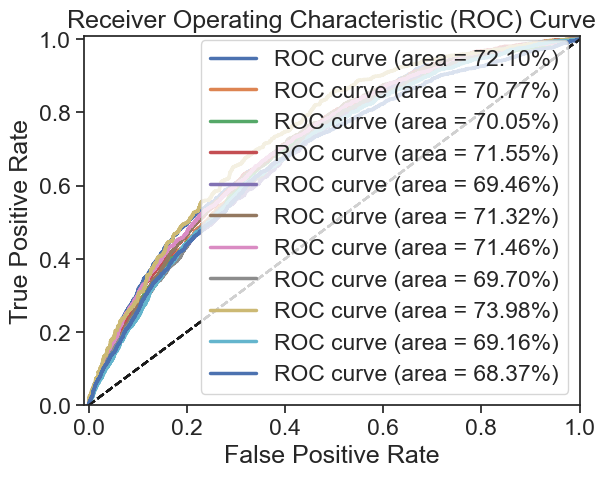

In [68]:
cv_12months(df_1mil, 'LR')

## Pseudo-Code

#### Cross Validation (esboço)

In [ ]:
### Remove last month of data from the Dataset using the time key
df = df[df['TIME_KEY'] < '2022-12-01']
#### Crossvalidation

### Treinar o modelo com os dados de 2021 e testar os modelos com os dados de cada mês de 2022
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4],[1, 2], [3, 4],[1, 2], [3, 4],[1, 2], [3, 4],[1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14])
tscv = TimeSeriesSplit(gap=0, max_train_size=12, n_splits=5, test_size=1)
for train_index, test_index in tscv.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     #

In [ ]:
import numpy as np

# Define sliding window generator function
def sliding_window(start_index, end_index, window_size):
    for i in range(start_index, end_index - window_size +1):
        test_index = i + window_size
        if test_index < end_index:
            yield np.arange(i, i+window_size), np.array([test_index])
# Define example data
X = np.array([[1, 5], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]]) #variaveis preditivas de c/ mês
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) #labels de c/ mês

# Generate training/testing indices using sliding window
start_index = 1
end_index = len(X)
window_size = 3

for train_index, test_index in sliding_window(start_index, end_index, window_size):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(f'X_train: {X_train} \n y_train: {y_train} \n X_test: {X_test} \n y_test: {y_test}\n\n')
    


In [ ]:
#randomly generate an array composed of 24 arrays with two values in each one
X = np.random.randint(10, size=(24, 2))

#generate array with the labels of each month for two years (1 to 24)
y = np.arange(1,25)

# Generate training/testing indices using sliding window
start_index = 1
end_index = 12
window_size = 12

# Define training and testing indices
train_start = 0
train_end = 12
test_start = train_end
test_end = len(X)

# Generate training/testing indices
train_indices = np.arange(train_start, train_end)
test_indices = np.arange(test_start, test_end)

for i, test_index in enumerate(test_indices):
    train_index = train_indices
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index].reshape(1, -1)
    y_train, y_test = y[train_index], y[test_index].reshape(1, )
    
    # Update train_end and test_end
    if i < len(test_indices) - 1:
        train_end += 1
        test_end += 1
        train_indices = np.arange(train_start, train_end)
        test_indices = np.arange(test_start, test_end)


In [ ]:
window_size = 12

#randomly generate an array composed of 24 arrays with two values in each one
X = np.random.randint(10, size=(23, 2))

#generate array with the labels of each month for two years (1 to 24)
y = np.arange(1,25)

# Generate training/testing indices using sliding window
start_index = 0
end_index = 12
window_size = 12

# Define training and testing indices
train_start = 0
train_end = 12
test_start = train_end
test_end = len(X)

for i in range(len(X) - window_size):
    # Define training and testing indices
    train_start = i
    train_end = i + window_size
    test_start = i + window_size
    test_end = i + window_size + 1
    
    # Generate training/testing indices
    train_indices = np.arange(train_start, train_end)
    test_indices = np.arange(test_start, test_end)
    
    print("TRAIN:", train_indices, "TEST:", test_indices)
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

------------

## Function Creation

In [ ]:
### Change the type of all the columns to INT and Bools
X_test = X_test.astype(int)
X_train = X_train.astype(int)
y_test = y_test.astype(bool)
y_train = y_train.astype(bool)

## Modeling

### Logistic Regression

#### Logistic Regression Test

### Naive Bayes

In [ ]:
target_names = ['No buy', 'Buy']
starting_timenb = datetime.datetime.now()
clf = Pipeline([
        ('clf', GaussianNB())])  
param_grid = {}

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
NB = Pipeline([('gs', gs)]) 


NB.fit(X_train,y_train)
results = get_results(NB, 'Naive Bayes', X_test, y_test, 
                      target_names = target_names, reasume=True)

end_timenb = datetime.datetime.now()
difnb= end_timenb - starting_timenb
results_imbalanced = results.copy()

### KNN 

In [ ]:
cols_clean = cols
starting_timeknn = datetime.datetime.now()
clf = Pipeline([
        ('clf', KNeighborsClassifier())]) 
# a list of dictionaries to specify the parameters that we'd want to tune
SEL = cols_clean
param_grid =\
    [{'clf__n_neighbors': [23]   #range(1,200,2)
     ,'clf__metric': ['manhattan'] #['manhattan', 'euclidean', 'minkowski '] 
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

KNNC = Pipeline([
      #  ('sel', select_fetaures(select_cols=SEL)),
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

KNNC.fit(X_train,y_train)

results = get_results(KNNC, 'KNN', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timeknn = datetime.datetime.now()
difknn = end_timeknn - starting_timeknn
results_imbalanced = results_imbalanced.append(results)

### Decision Tree

In [ ]:
starting_timedt = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', DecisionTreeClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__criterion': ['entropy'] #['gini', 'entropy']
      ,'clf__max_depth': [6] #range(1, 51) # [15, 20, 25]
      ,'clf__min_samples_leaf':  [117]  # range(100, 150) 
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
DT = Pipeline([
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

DT.fit(X_train,y_train)

results = get_results(DT, 'Decision Tree', X_test, y_test, target_names = target_names, results = results, reasume=False)
end_timedt = datetime.datetime.now()
difdt= end_timedt - starting_timedt
results_imbalanced = results_imbalanced.append(results)

### Support Vector Machines

In [ ]:
from sklearn.svm import SVC, LinearSVC
starting_timesvm = datetime.datetime.now()
clf = Pipeline([
      #  ('pca', PCA()),
        ('clf', SVC())])
 

# a list of dictionaries to specify the parameters that we'd want to tune
C =  [0.06] #, 0.08, 0.07] #, 1.0, 10.0, 100.0, 1000.0]
Gamma = [0.1] #[1,0.1,0.01,0.001]
Kernel = ['rbf'] #['rbf', 'poly', 'sigmoid']
SEL = cols_clean
#n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
#whiten = [True, False]

param_grid =\
    [{'clf__C': C
     ,'clf__gamma': Gamma
     ,'clf__kernel' : Kernel
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

SVC = Pipeline([
        ('sel', select_fetaures(select_cols=SEL)),
       # ('scl', StandardScaler()),
        #('lda', LDA(n_components = 2, store_covariance=True)),
        ('gs', gs)
 ])  

SVC.fit(X_train,y_train)

results  = get_results(SVC, 'Support Vector Machine - Oversampling', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timesvm = datetime.datetime.now()
difsvm_o = end_timesvm - starting_timesvm
#results_oversampling = results_oversampling.append(results)

### Random Forest

In [ ]:
starting_timerf = datetime.datetime.now()
clf = Pipeline([
                #('pca', PCA()),
                ('clf', RandomForestClassifier())])  

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{ 'clf__criterion': ['gini', 'entropy']
      ,'clf__n_estimators':  [2000]       
      ,'clf__min_samples_split': [117]
      ,'clf__max_depth': [6] #, 3, 4, 5, 10] #

}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
RF = Pipeline([
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ]) 
     
RF.fit(X_train,y_train)

results = get_results(RF, 'Random Forest - Smote', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timerf = datetime.datetime.now()
difrf_s = end_timerf - starting_timerf
#results_smote = results_smote.append(results)

### Gradient Boosting

In [ ]:
starting_timegb = datetime.datetime.now()
clf = Pipeline([
        #('pca', PCA()),
        ('clf', GradientBoostingClassifier())])  

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__learning_rate': [1e-02] #, 5e-03, 2e-02]
     ,'clf__max_depth': [10]
     ,'clf__n_estimators' : [400] 
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

GBC = Pipeline([
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ])  

GBC.fit(X_train,y_train)

results = get_results(GBC, 'Gradient Boosting - Smote', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timegb = datetime.datetime.now()
difgb_s = end_timegb - starting_timegb
#results_smote = results_smote.append(results)

### AdaBoost

In [ ]:
starting_timeab = datetime.datetime.now()
clf = Pipeline([
        #('pca', PCA()),
        ('clf', AdaBoostClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__learning_rate': [2e-01, 15e-02]
     ,'clf__n_estimators': [500, 600, 700] 
     ,'clf__algorithm' : ['SAMME.R'] # 'SAMME'
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

ADAB = Pipeline([
     #   ('scl', StandardScaler()),
        ('gs', gs)
 ])  

ADAB.fit(X_train,y_train)

results = get_results(ADAB, 'AdaBoost - Smote', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
results_imbalanced = results_imbalanced.append(results)
end_timeab = datetime.datetime.now()
difab_s = end_timeab - starting_timeab
#results_smote = results_smote.append(results)